In [79]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

In [61]:
data = pd.read_csv("./FIFA18_players_database/clean_data_normalized.csv")

In [62]:
data.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,0.425926,0.705128,0.446429,0.388889,0.279070,0.54,0.285714,0.281690,0.274510,0.272727,...,0.511628,0.413793,0.6125,0.333333,0.830189,0.654321,0.660714,0.464286,0.266667,CDM
1,0.648148,0.641026,0.732143,0.481481,0.325581,0.06,0.190476,0.380282,0.274510,0.220779,...,0.279070,0.396552,0.5125,0.604167,0.773585,0.543210,0.500000,0.285714,0.466667,CM
2,0.629630,0.448718,0.339286,0.092593,0.604651,0.70,0.365079,0.295775,0.529412,0.714286,...,0.348837,0.706897,0.0750,0.645833,0.056604,0.197531,0.946429,0.482143,0.666667,ST
3,0.351852,0.756410,0.589286,0.629630,0.720930,0.74,0.761905,0.704225,0.705882,0.766234,...,0.651163,0.758621,0.4875,0.270833,0.433962,0.555556,0.535714,0.732143,0.680000,CM
4,0.462963,0.820513,0.375000,0.185185,0.604651,0.74,0.365079,0.197183,0.509804,0.311688,...,0.558140,0.362069,0.8000,0.541667,0.603774,0.814815,0.839286,0.196429,0.280000,CB


In [63]:
X = data.drop(columns=['Preferred Positions'])
y = data['Preferred Positions']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
svm_classifier = SVC(kernel='linear', class_weight='balanced')
svm_classifier.fit(X_train, y_train)
y_test_pred = svm_classifier.predict(X_test)
y_train_pred = svm_classifier.predict(X_train)

# Calculate test and train accuracy
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# Print accuracy with 3 decimals
print(f"Accuracy of train: {acc_train:.3f}")
print(f"Accuracy of test: {acc_test:.3f}")

Accuracy of train: 0.353
Accuracy of test: 0.324


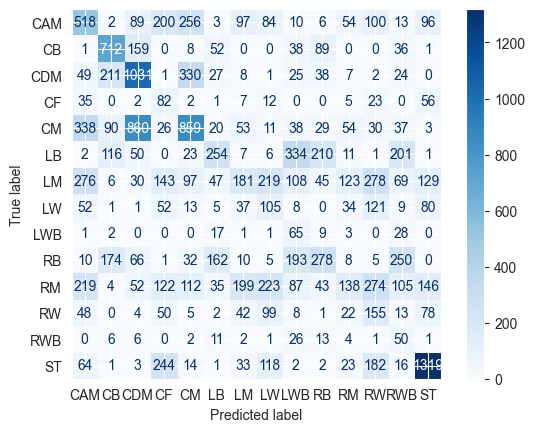

In [76]:
# Matrix of train
ConfusionMatrixDisplay.from_estimator(svm_classifier, X_train, y_train, cmap="Blues")

Notice the predictions, ex: CDM is predicted as both CDM and CM.

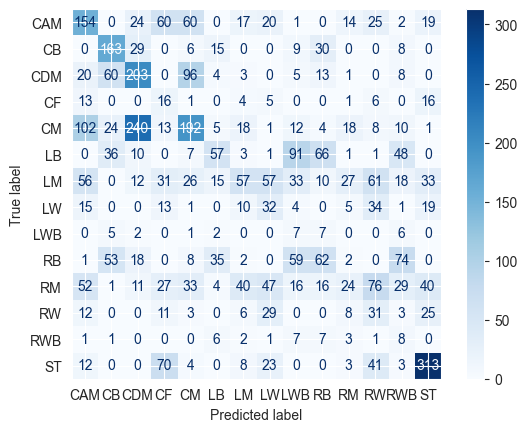

In [77]:
# Matrix of test
ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test, cmap="Blues")

In [81]:
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'kernel': ['linear', 'rbf'],      # Kernel type
    'gamma': ['scale', 'auto'],       # Kernel coefficient
    'class_weight': ['balanced', None]  # Class weights
}

grid_search = GridSearchCV(estimator = svm_classifier, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


KeyboardInterrupt: 